In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [18]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 32EA-CE9F

 Directory of C:\Users\HP\Music\gfg da\Projects

28-03-2025  14:08    <DIR>          .
26-03-2025  19:02    <DIR>          ..
26-03-2025  19:33    <DIR>          .ipynb_checkpoints
26-03-2025  19:36             5,648 List of Countries by Sugarcane Production.csv
28-03-2025  14:08         1,023,535 sugarcane production eda.ipynb
               2 File(s)      1,029,183 bytes
               3 Dir(s)  219,575,648,256 bytes free


In [20]:
data=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [22]:
data

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [24]:
data.shape

(103, 7)

In [26]:
data.ndim

2

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


## Data cleaning

In [31]:
data["Production (Tons)"]=data["Production (Tons)"].str.replace(".","")

In [33]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348448000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123059739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87468496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65450704,324219,1.130.820,57.879


In [35]:
data["Production per Person (Kg)"]=data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage (Hectare)"]=data["Acreage (Hectare)"].str.replace(".","")
data["Yield (Kg / Hectare)"]=data["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")


In [37]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [39]:
data.rename(columns={"Production (Tons)":"Production(Tons)","Production per Person (Kg)":"Production_per_Person(Kg)","Acreage (Hectare)":"Acreage(Hectare)","Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [41]:
data.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [43]:
data.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [45]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [47]:
data.dropna(inplace=True)

In [49]:
data.shape

(102, 7)

In [51]:
data.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [53]:
data

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [55]:
data.reset_index(inplace=True)

In [57]:
data

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


In [59]:
data.drop(columns={"index","Unnamed: 0"},inplace=True)

In [61]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [63]:
data=data.astype({"Production(Tons)":float,"Production_per_Person(Kg)":float,"Acreage(Hectare)":float,"Yield(Kg/Hectare)":float})

In [65]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    102 non-null    object 
 1   Continent                  102 non-null    object 
 2   Production(Tons)           102 non-null    float64
 3   Production_per_Person(Kg)  102 non-null    float64
 4   Acreage(Hectare)           102 non-null    float64
 5   Yield(Kg/Hectare)          102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 4.9+ KB


In [69]:
data.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [71]:
data.duplicated().sum()

0

## Univariate Analysis

In [74]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


How many countries produce sugarcane from each of the continent

In [77]:
data["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent', ylabel='count'>

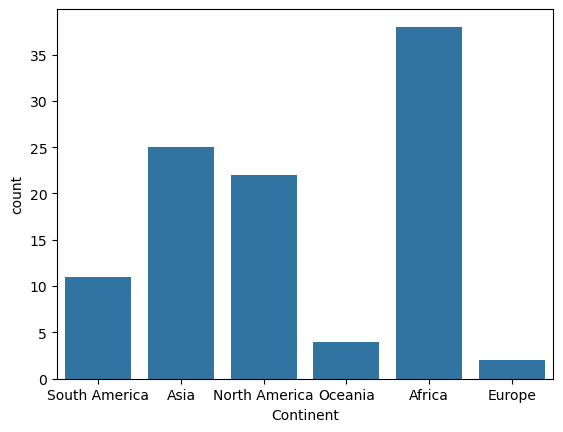

In [79]:
sns.countplot(data=data,x="Continent")

<Axes: ylabel='count'>

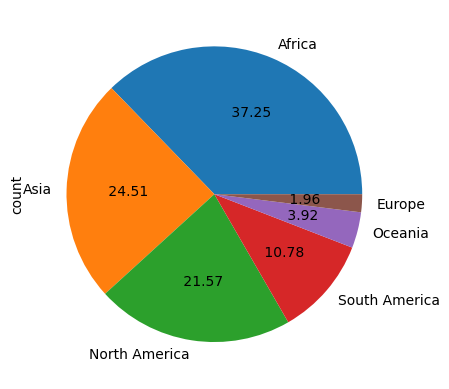

In [81]:
data["Continent"].value_counts().plot(kind="pie",autopct="% .2f")

Numerical Analysis

In [84]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


C:\Users\HP\AppData\Local\Temp\ipykernel_21488\3544809035.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Production(Tons)"])
C:\Users\HP\AppData\Local\Temp\ipykernel_21488\3544809035.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Production_per_Person(Kg)"])
C:\Users\HP\App

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

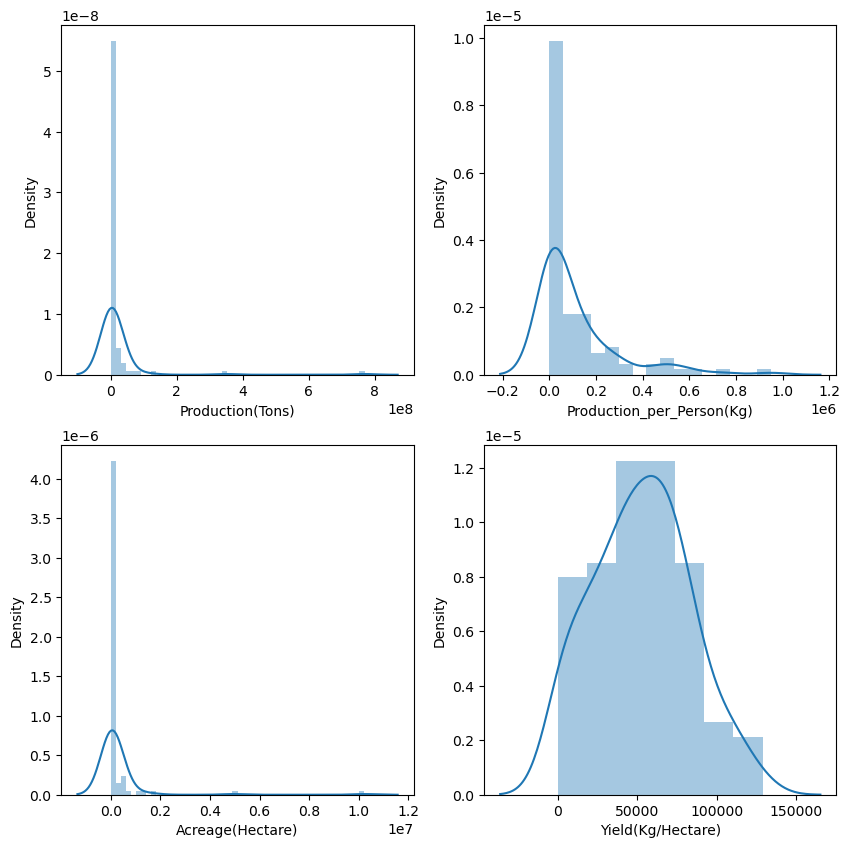

In [86]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(data["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(data["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(data["Yield(Kg/Hectare)"])

Checking Outliers
(We won't remove outliers as it will remove countries that are producing sugercane in very large amount)

<Axes: ylabel='Yield(Kg/Hectare)'>

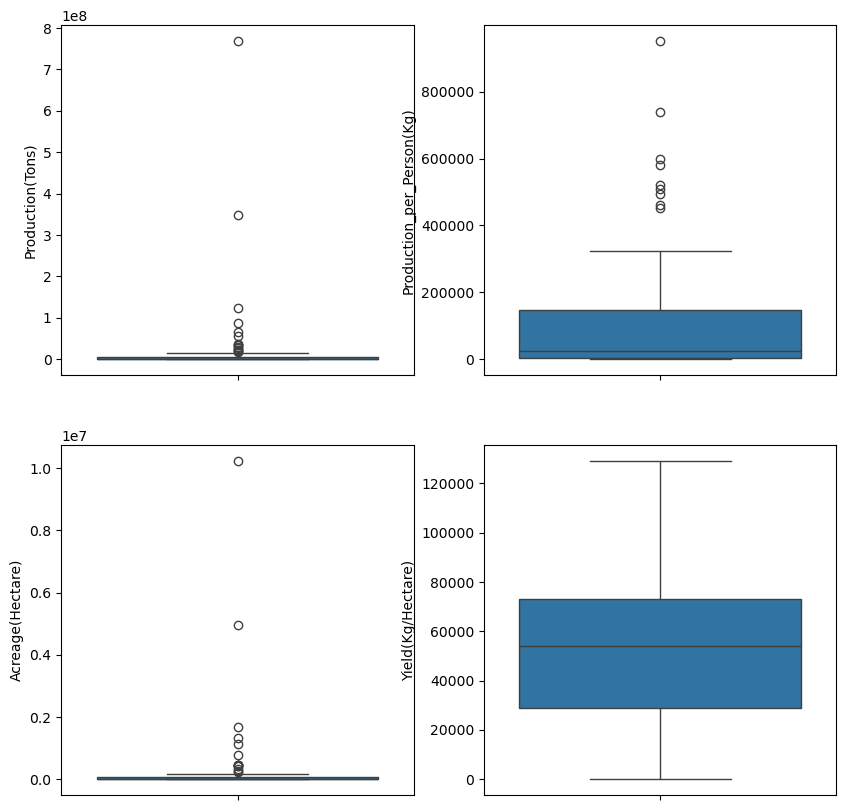

In [89]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(data["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(data["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(data["Yield(Kg/Hectare)"])

In [90]:
data.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

In [94]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


Which Country produces maximum sugarcane

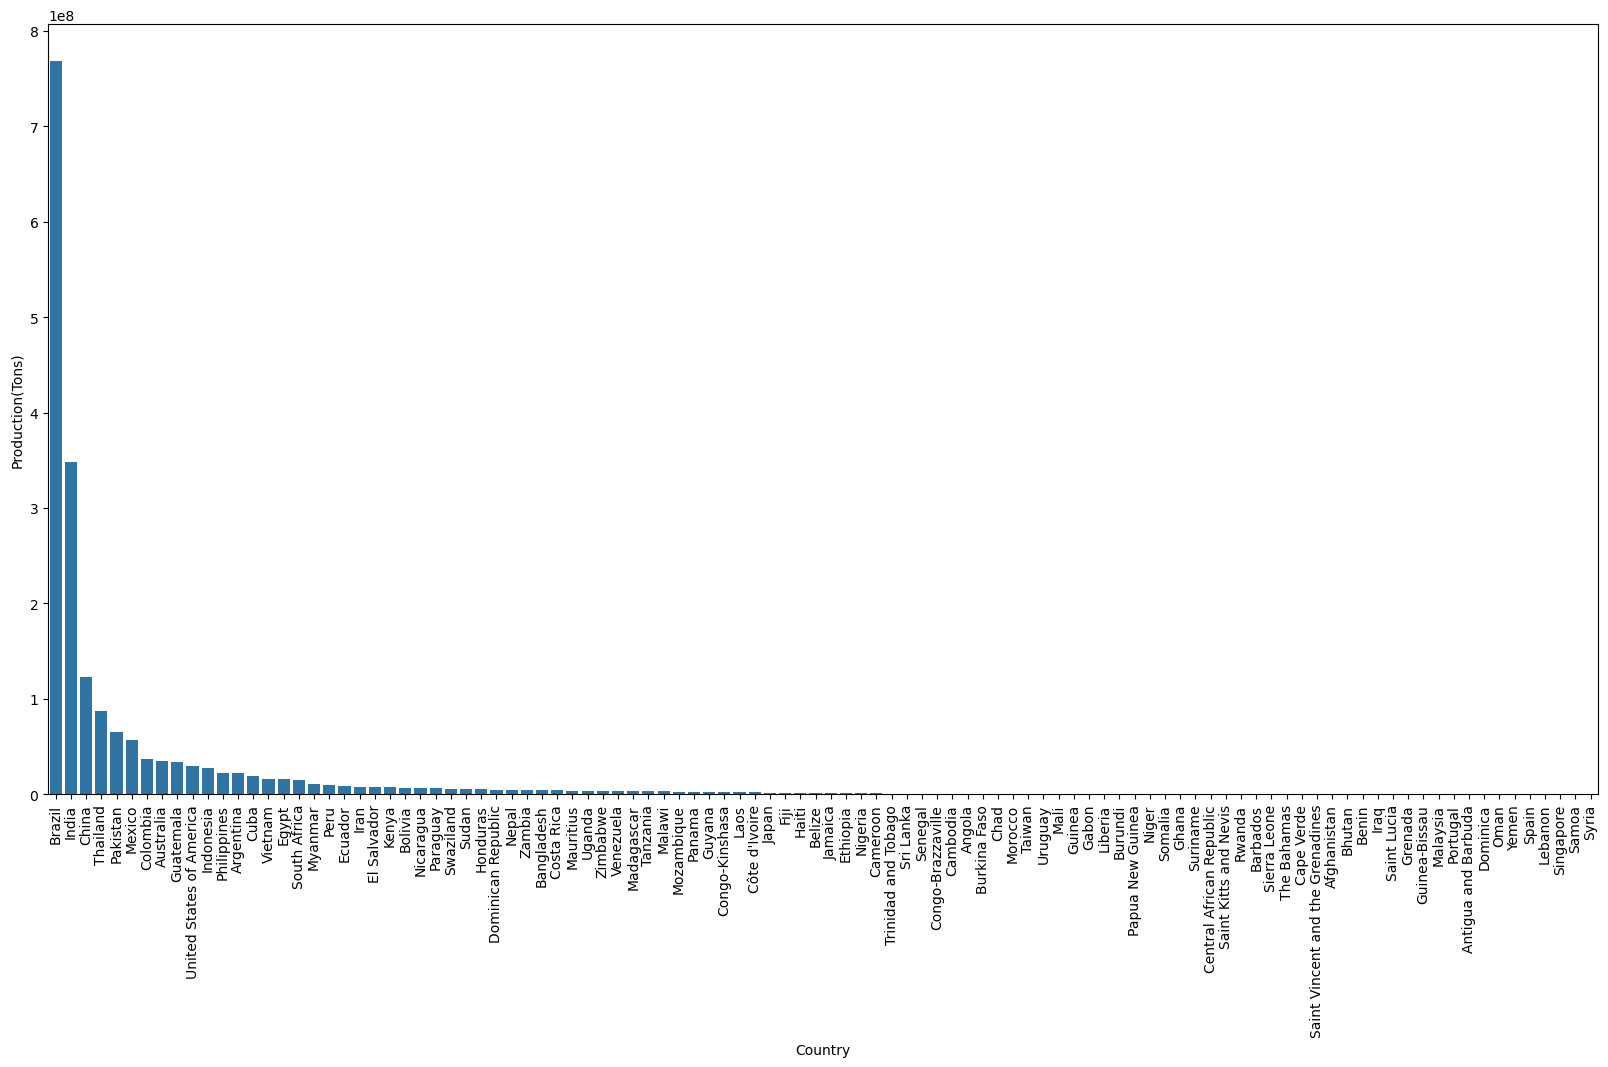

In [97]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x="Country",y="Production(Tons)")
plt.xticks(rotation=90)
plt.show()

In [98]:
new_data=data[["Country","Production(Tons)"]].set_index("Country")
new_data

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


<Axes: ylabel='Production(Tons)'>

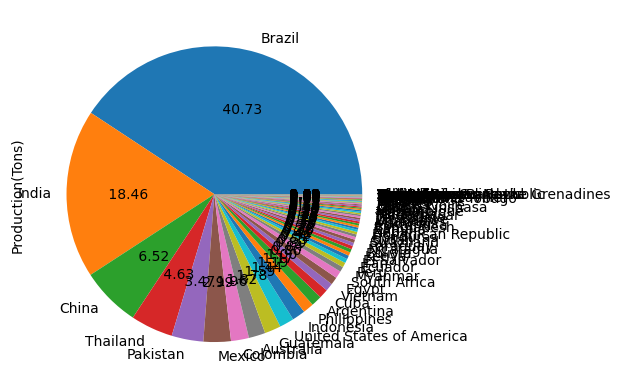

In [99]:
new_data["Production(Tons)"].plot(kind="pie",autopct="% 0.2f")

In [102]:
new_data.sort_values("Production(Tons)",ascending=False,inplace=True)
new_data.head()

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


Which Country has the Highest land

In [105]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


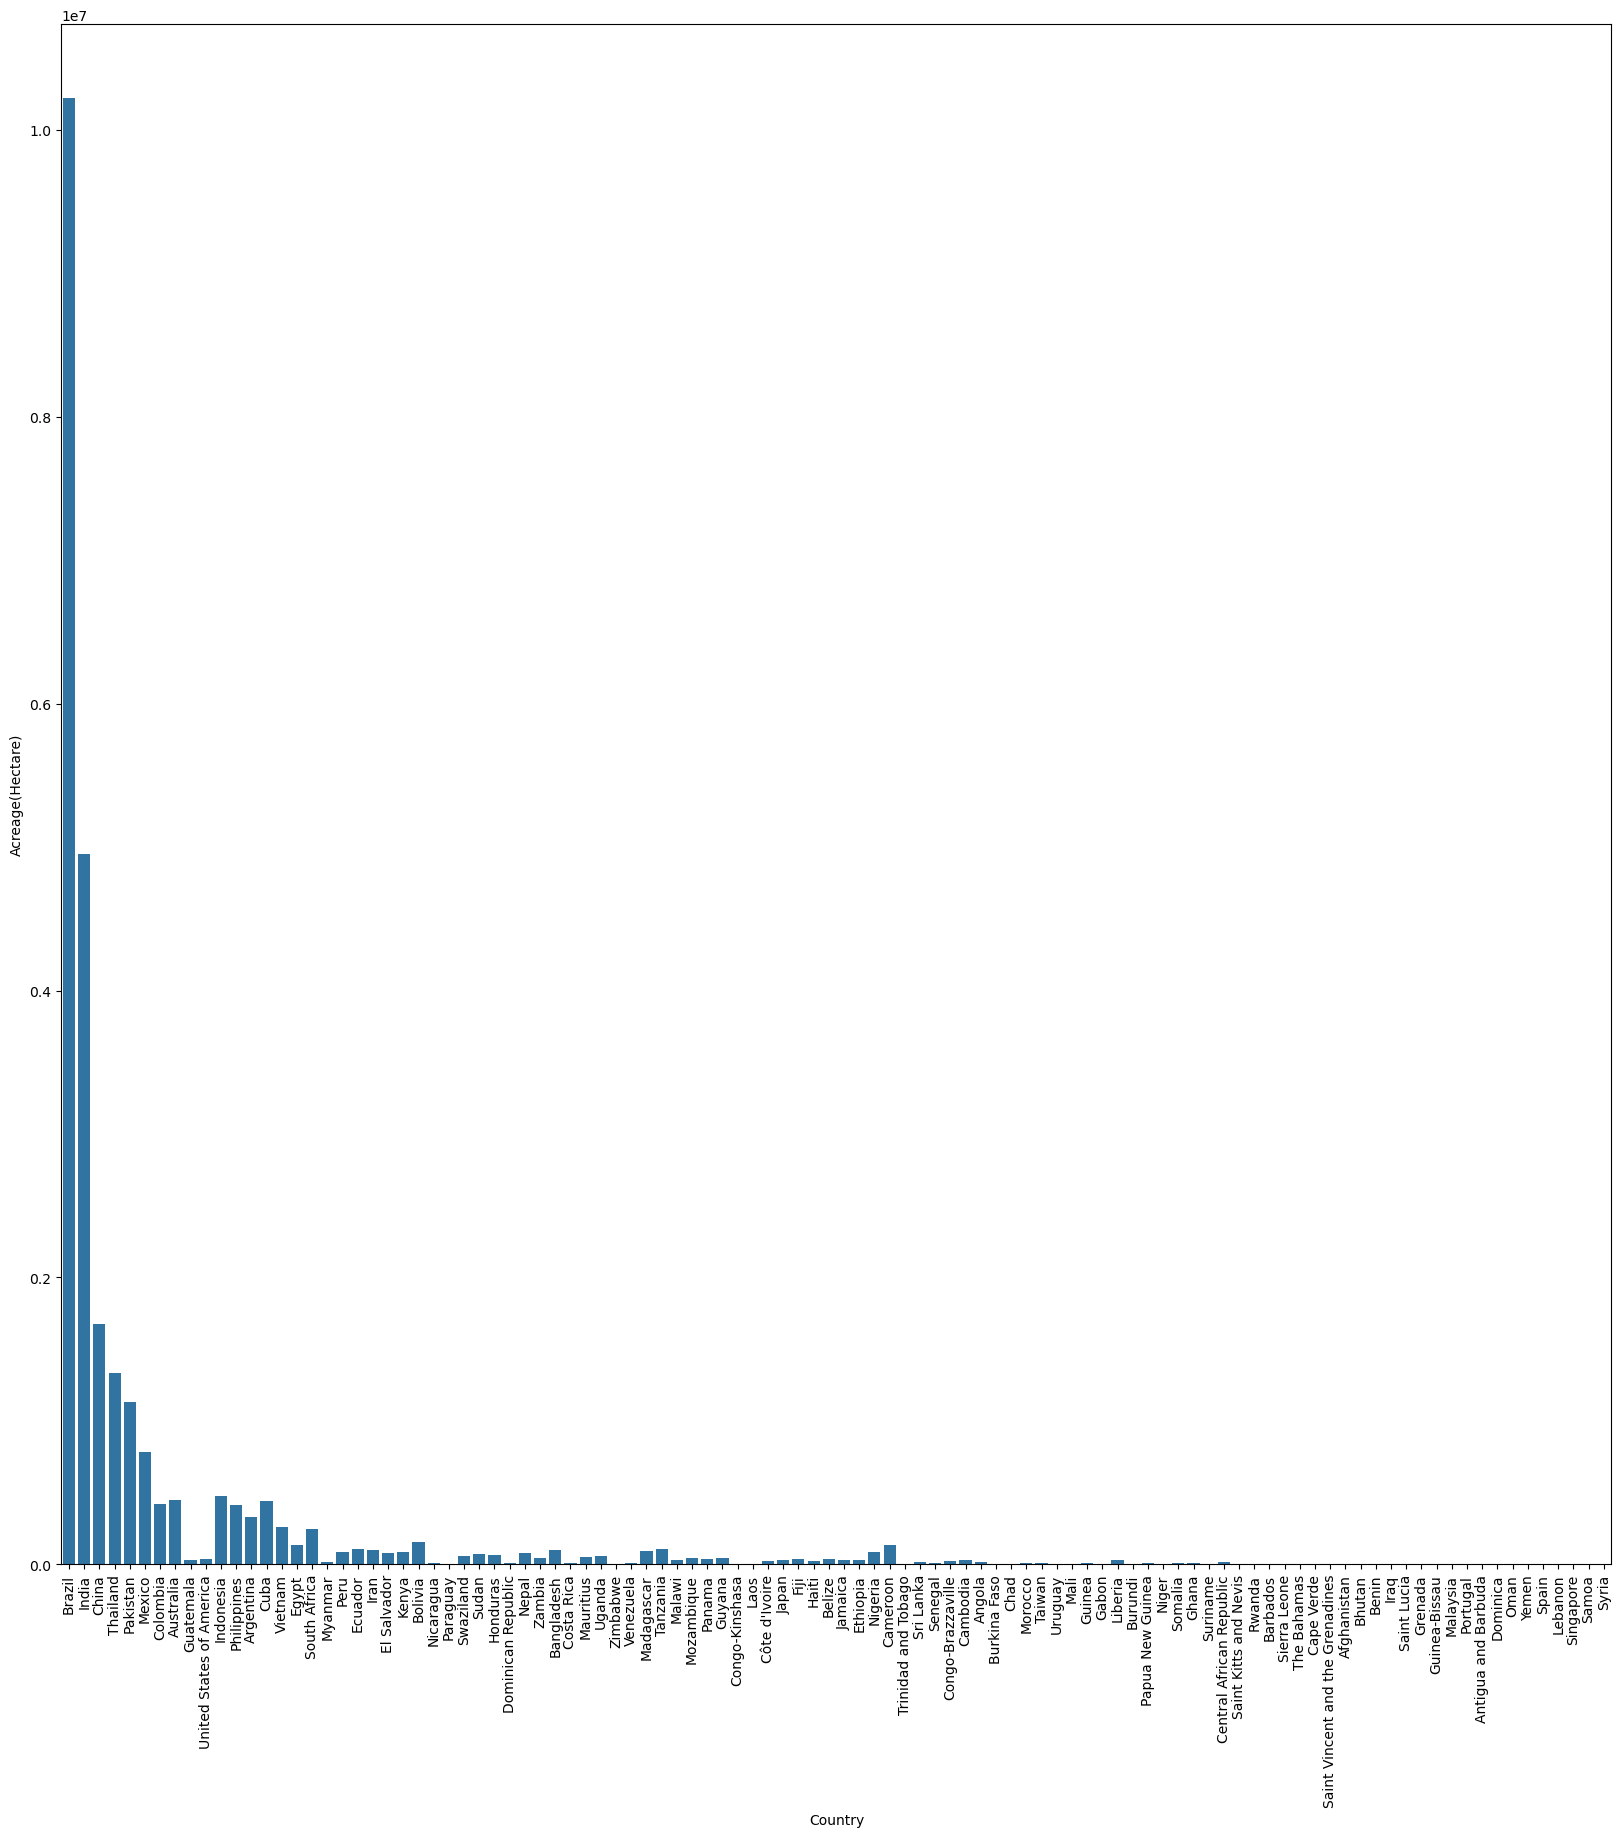

In [108]:
plt.figure(figsize=(20,20))
sns.barplot(data=data,x="Country",y="Acreage(Hectare)")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Acreage(Hectare)'>

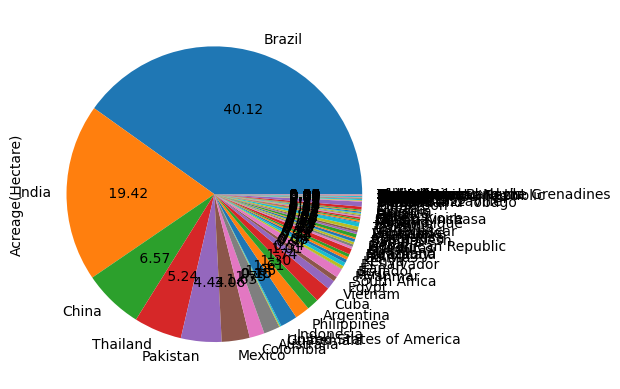

In [109]:
data.set_index("Country")["Acreage(Hectare)"].plot(kind="pie",autopct="% .2f")

In [110]:
data.sort_values("Acreage(Hectare)",ascending=False).set_index("Country").head(10)

,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Country,,,,,
Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
India,Asia,348448000.0,260721.000,4950000.0,70393.5
China,Asia,123059739.0,88287.000,1675215.0,73459.1
Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
Mexico,North America,56446821.0,452524.000,781054.0,7227.0
Indonesia,Asia,27158830.0,10248.000,472693.0,57455.5
Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
Cuba,North America,18890972.0,1683.528,442307.0,42710.1


<Axes: ylabel='Acreage(Hectare)'>

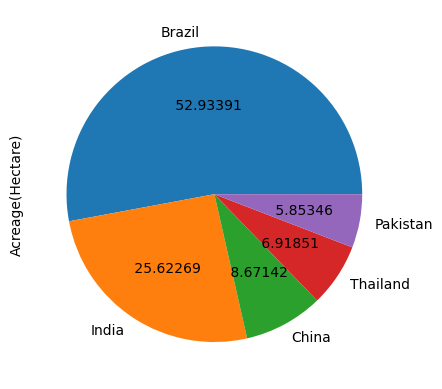

In [111]:
data.sort_values("Acreage(Hectare)",ascending=False).set_index("Country")["Acreage(Hectare)"].head().plot(kind="pie",autopct="% .5f")

<Axes: xlabel='Country', ylabel='Acreage(Hectare)'>

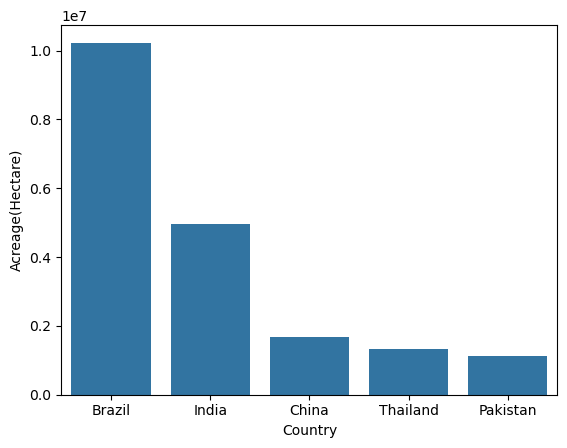

In [113]:
sns.barplot(data=data.sort_values("Acreage(Hectare)",ascending=False).head(),y="Acreage(Hectare)",x="Country")

Which Country has highest yeild per hectare

In [119]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


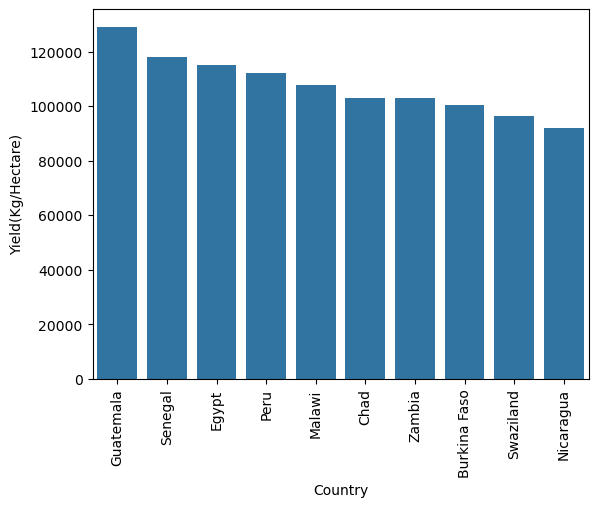

In [121]:
sns.barplot(data=data.sort_values("Yield(Kg/Hectare)",ascending=False).head(10),x="Country",y="Yield(Kg/Hectare)")
plt.xticks(rotation=90)
plt.show()

In [123]:
data.sort_values("Yield(Kg/Hectare)",ascending=False).head(10)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
57,Senegal,Africa,696992.0,44321.000,5902.0,118085.3
15,Egypt,Africa,15760418.0,161651.000,137011.0,115030.6
18,Peru,South America,9832526.0,314768.000,87696.0,112120.2
40,Malawi,Africa,2915406.0,162584.000,27087.0,107629.5
62,Chad,Africa,455986.0,297.000,4433.0,102867.1
31,Zambia,Africa,4285839.0,253784.000,41695.0,102789.6
61,Burkina Faso,Africa,484872.0,23951.000,4823.0,100526.3
26,Swaziland,Africa,5583295.0,4816.299,57851.0,96511.4
24,Nicaragua,North America,6815147.0,1084.393,7413.0,91935.1


## Correlation

In [126]:
data.select_dtypes(exclude="object").corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


Relationship between Agriculture land and Production 

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

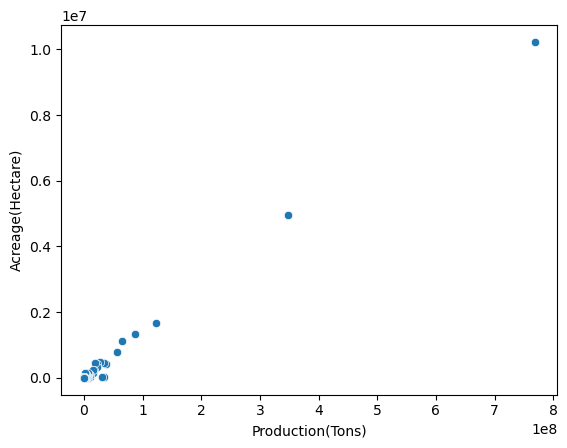

In [129]:
sns.scatterplot(data=data,x="Production(Tons)",y="Acreage(Hectare)")

Do countries that yeild per sugarcane per hec produces more sugercane overall : No

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

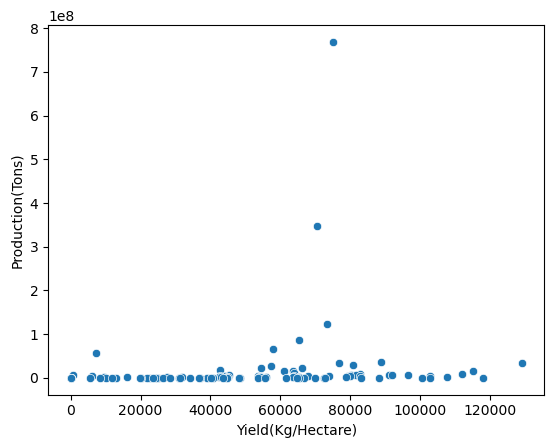

In [132]:
sns.scatterplot(data=data,x="Yield(Kg/Hectare)",y="Production(Tons)")

## Analysis WRT Continent

Which continent produces more sugarcane

In [136]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<Axes: xlabel='Continent', ylabel='Production(Tons)'>

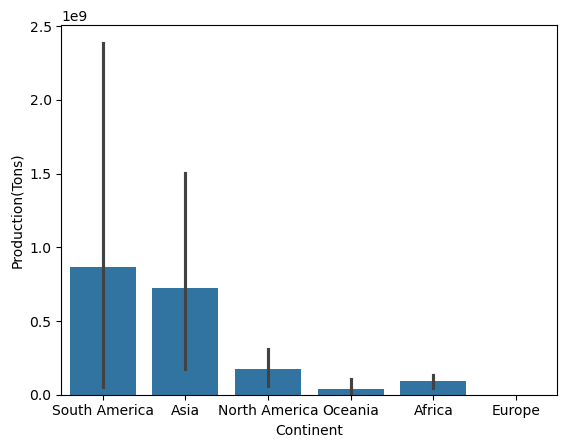

In [138]:
sns.barplot(data=data,x="Continent",y="Production(Tons)",estimator='sum')

In [144]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [150]:
new_data=data.groupby("Continent").sum()

In [156]:
new_data.drop(columns={"Country"},inplace=True)

In [158]:
new_data.head()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1


<Axes: ylabel='Production(Tons)'>

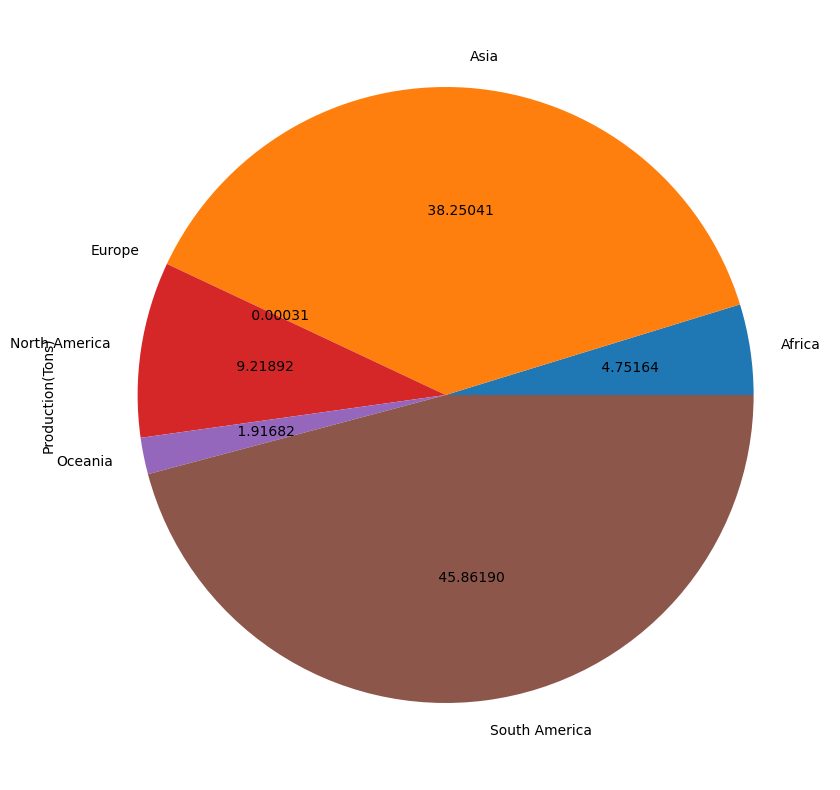

In [166]:
plt.figure(figsize=(10,10))
new_data["Production(Tons)"].plot(kind="pie",autopct="% .5f")

<Axes: xlabel='Continent'>

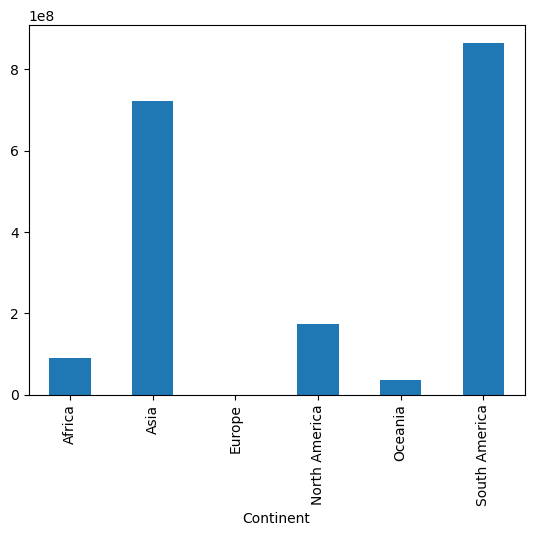

In [168]:
new_data["Production(Tons)"].plot(kind="bar")

<Axes: xlabel='Continent'>

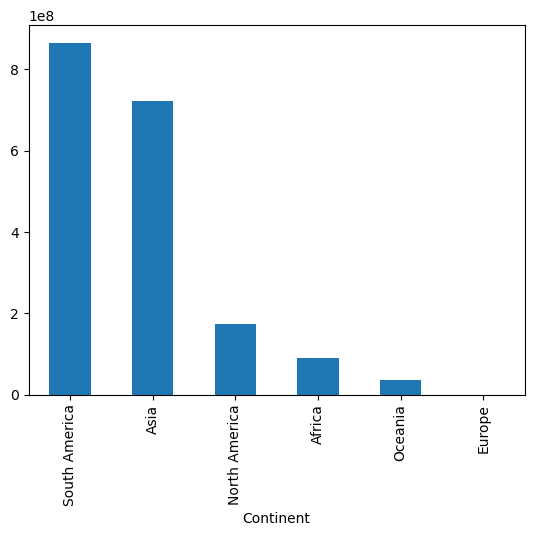

In [172]:
new_data["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

In [180]:
new_data["country"]=data.groupby("Continent").count()["Country"]

In [182]:
new_data

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),country
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


([<matplotlib.axis.XTick at 0x2018a6ef5c0>,
 [Text(38, 0, 'Africa'),
  Text(25, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(22, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(11, 0, 'South America')])

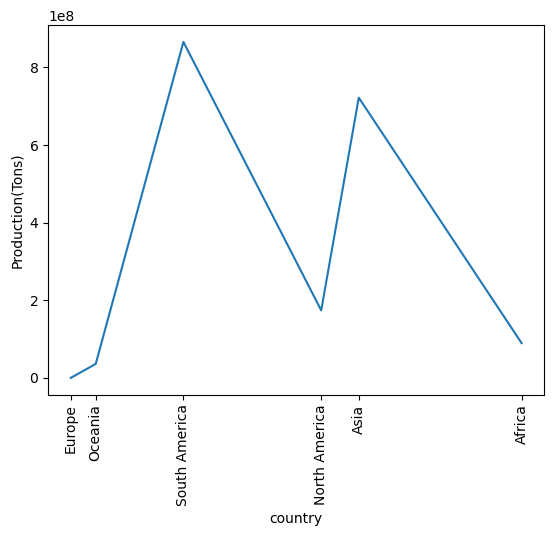

In [200]:
sns.lineplot(data=new_data,x="country",y="Production(Tons)")
plt.xticks(new_data["country"],new_data.index,rotation=90)

In [186]:
new_data.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='Continent')